In [33]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(12,10)})

### Loading the Dataset

In [34]:
dataload = pd.read_csv("data/imdb_series.csv")
dataload

,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0
...,...,...,...,...,...,...,...,...
9395,"6,471.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.4,NaN,168.0
9396,"6,472.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.5,NaN,140.0
9397,"6,473.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.6,NaN,128.0
9398,"6,474.",The Dukes of Hazzard,(1979–1985),49 min,"Action, Comedy",7.3,NaN,146.0


In [35]:
dataload.head()


,ranking,title,year,duration,genre,rating,directors,votes
0,"5,406.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
1,"5,407.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
2,"5,408.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
3,"5,409.",Cop Shop,(1977–1984),NaN,NaN,NaN,NaN,NaN
4,"5,410.",Cops,(1989–2023),NaN,NaN,7.0,NaN,12.0


In [36]:
dataload.columns

Index(['ranking', 'title', 'year', 'duration', 'genre', 'rating', 'directors',
       'votes'],
      dtype='object')

### After cleaning up and isolating the data needed

In [37]:
dataload_ex = dataload.dropna()
dataload_ex

,ranking,title,year,duration,genre,rating,directors,votes
225,"6,961.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.3,"Christopher Berkeley,Chris Dozois,Tara Strong,...",27.0
231,"6,967.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",5.6,"Tim Eldred,Bob Fuentes III,Tara Strong,Maurice...",25.0
237,"6,973.",Extreme Ghostbusters,(1997),20 min,"Animation, Action, Adventure",7.1,"Christopher Berkeley,Chris Dozois,Tara Strong,...",32.0
245,"6,981.",Extreme Ghostbusters,(1997),21 min,"Animation, Action, Adventure",6.4,"Gloria Jenkins,Scott Wood,Tara Strong,Maurice ...",40.0
405,"1,178.",The Adventures of Robin Hood,(1955–1960),25 min,"Action, Adventure, Family",6.9,"Terry Bishop,Sidney Cole,Richard Greene,Archie...",26.0
...,...,...,...,...,...,...,...,...
8969,"7,720.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.7,"Takamitsu Kawamura,Kazuo Terada,Brigitte Bako,...",166.0
8970,"7,721.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.4,"Takamitsu Kawamura,Kazuo Terada,Keith David,Sa...",234.0
8990,"7,741.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.1,"Takamitsu Kawamura,Kazuo Terada,Thom Adcox-Her...",147.0
8995,"7,746.",Gargoyles,(1994–1997),22 min,"Animation, Action, Adventure",7.3,"Saburo Hashimoto,Kazuo Terada,Keith David,Sall...",275.0


# Analysing the data

### Using the data we find which genres were the top genre for the years mentioned on the website

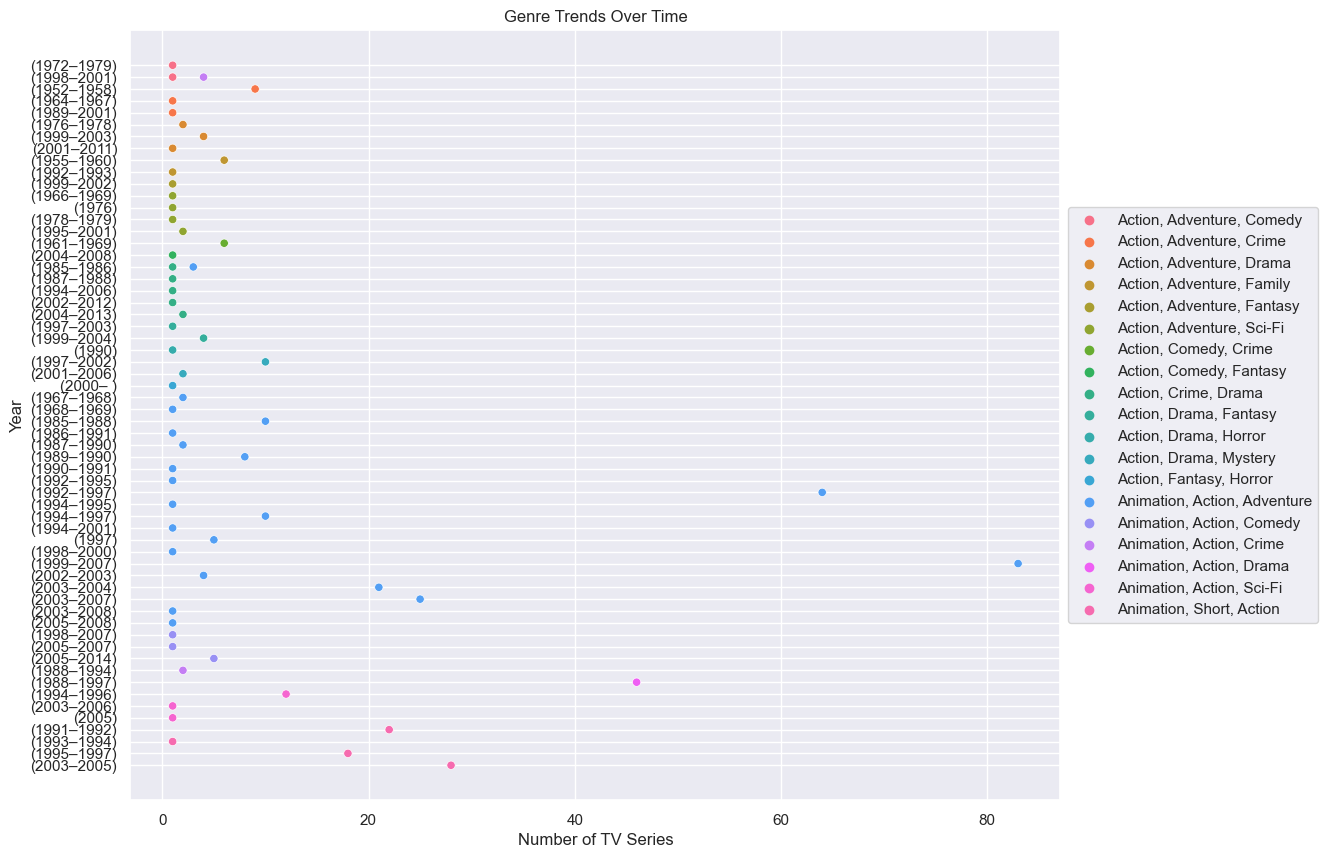

                        genre         year  count
0   Action, Adventure, Comedy  (1972–1979)      1
1   Action, Adventure, Comedy  (1998–2001)      1
2    Action, Adventure, Crime  (1952–1958)      9
3    Action, Adventure, Crime  (1964–1967)      1
4    Action, Adventure, Crime  (1989–2001)      1
..                        ...          ...    ...
57  Animation, Action, Sci-Fi       (2005)      1
58   Animation, Short, Action  (1991–1992)     22
59   Animation, Short, Action  (1993–1994)      1
60   Animation, Short, Action  (1995–1997)     18
61   Animation, Short, Action  (2003–2005)     28

[62 rows x 3 columns]


In [38]:
# grouping data
genre_over_the_years = dataload_ex[["genre","year"]]
genre_year = genre_over_the_years.groupby(["genre","year"]).size().reset_index(name='count')



# plot
sns.scatterplot(data=genre_year, x= "count",y="year", hue="genre")
plt.xlabel('Number of TV Series')
plt.ylabel('Year')
plt.title('Genre Trends Over Time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
print(genre_year)

### Listing the top 20 directors based on their average ratings

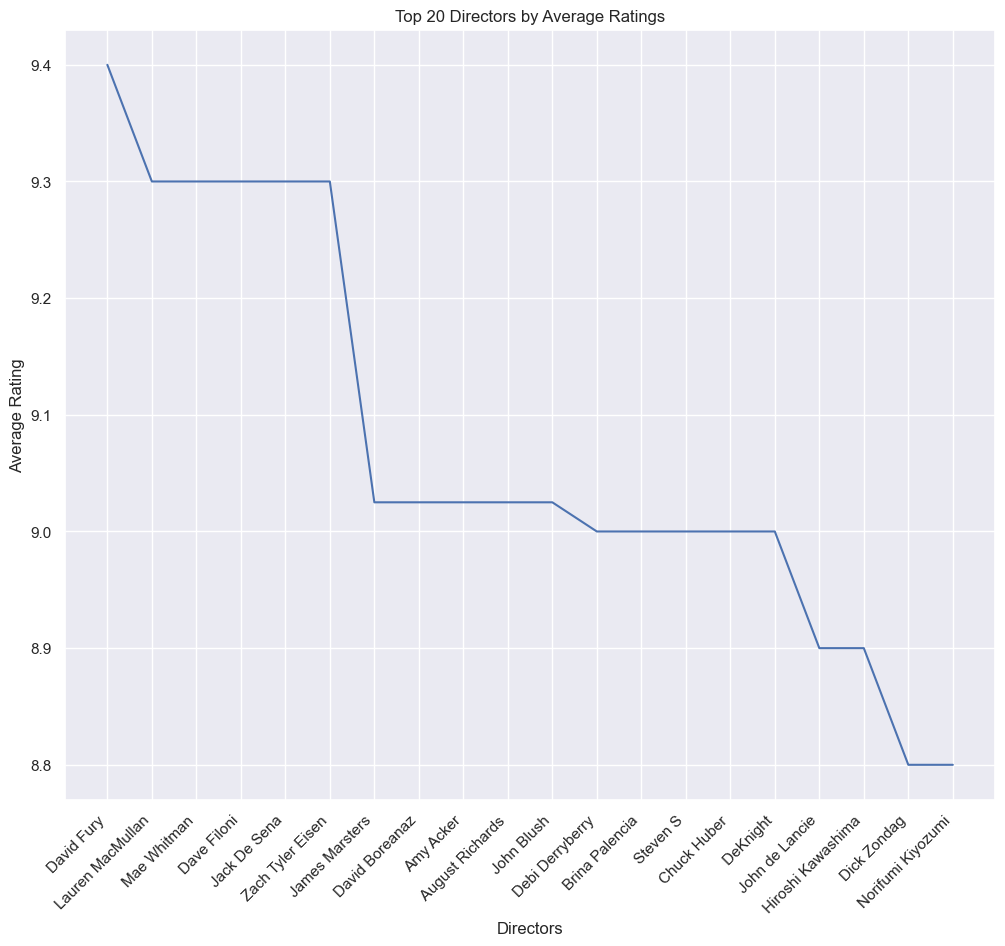

             directors  rating
167         David Fury   9.400
381   Lauren MacMullan   9.300
404        Mae Whitman   9.300
162        Dave Filoni   9.300
265       Jack De Sena   9.300
720   Zach Tyler Eisen   9.300
276     James Marsters   9.025
165     David Boreanaz   9.025
54           Amy Acker   9.025
2      August Richards   9.025
299         John Blush   9.025
175    Debi Derryberry   9.000
101     Brina Palencia   9.000
613           Steven S   9.000
134        Chuck Huber   9.000
7             DeKnight   9.000
311     John de Lancie   8.900
250  Hiroshi Kawashima   8.900
180        Dick Zondag   8.800
484  Norifumi Kiyozumi   8.800


In [43]:


dataload_ex_copy = dataload_ex.copy()

# grouping data
dataload_ex_copy.loc[:, 'directors'] = dataload_ex_copy['directors'].astype(str).str.replace(r"[^a-zA-Z0-9\s]", ",", regex=True)
dataload_ex_copy.loc[:, 'directors'] = dataload_ex_copy['directors'].str.split(',')

# Calculate the average ratings of each director
director_rating_average = dataload_ex_copy.explode('directors').groupby('directors')['rating'].mean().reset_index()

# Sorting directors by their average ratings
director_rating_average = director_rating_average.sort_values('rating', ascending=False)


top_directors = director_rating_average.head(20)

# plotting
sns.lineplot(x='directors', y='rating', data=top_directors)
plt.ylabel('Average Rating')
plt.xlabel('Directors')
plt.title('Top 20 Directors by Average Ratings')
plt.xticks(rotation=45, ha='right')  
plt.show()

print(top_directors)

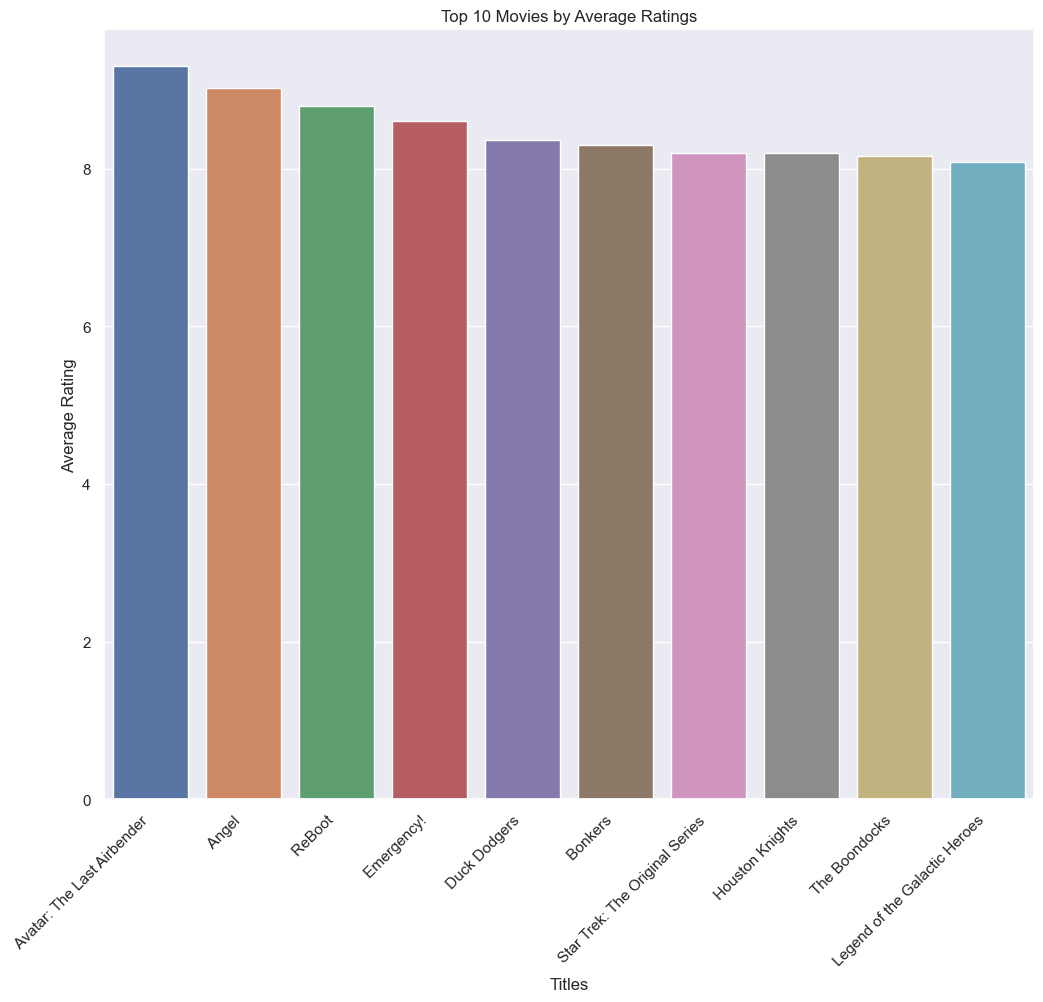

In [44]:
dataload_ex_copy2 = dataload_ex.copy()
movie_rating_average = dataload_ex_copy2.explode("title").groupby("title")["rating"].mean().reset_index()
movie_rating_average = movie_rating_average.sort_values("rating", ascending= False)
top_movies = movie_rating_average.head(10)

sns.barplot(x="title", y="rating", data=top_movies)
plt.ylabel('Average Rating')
plt.xlabel('Titles')
plt.title('Top 10 Movies by Average Ratings')
plt.xticks(rotation=45, ha='right')  
plt.show()
